# Boston Housing Price Prediction Project

In this project, we will work with the Boston Housing Dataset to predict house prices using various machine learning algorithms. The dataset contains information about various features of houses in Boston, such as crime rate, number of rooms, and more. Our goal is to build and evaluate predictive models to estimate house prices based on these features.

## Dataset Information

The Boston Housing Dataset is a commonly used dataset in the field of machine learning and regression analysis. It contains 506 samples and 14 features. The target variable is the median value of owner-occupied homes in $1000s (MEDV). Our aim is to create models that can predict this median value based on the provided features.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 12

MEDV: Median value of owner-occupied homes in $1000s

We can see that the input attributes have a mixture of units.

## Project Outline

1. **Data Loading and Preprocessing:**
   We will load the Boston Housing Dataset, perform any necessary data preprocessing, and split the data into training and test sets.

2. **Exploratory Data Analysis (EDA):**
   We will explore the dataset by visualizing the distributions of features, creating a correlation matrix heatmap, and analyzing any patterns or relationships.

3. **Model Building and Evaluation:**
   We will train and evaluate different regression models using the training data. The models will include Linear Regression, Random Forest, XGBoost, and Lasso Regression.

4. **Model Comparison and Selection:**
   We will compare the performance of each model using evaluation metrics such as mean squared error. The best-performing model will be selected for further evaluation on the test set.

5. **Final Model Evaluation:**
   We will evaluate the selected model's performance on the test set and interpret the results.

## Code Explanation

### Data Loading and Preprocessing

We will load the dataset from a URL, organize the data into features and the target variable, and split it into training and test sets.

### Exploratory Data Analysis (EDA)

We will visualize the distributions of features using histograms and create a correlation matrix heatmap to understand the relationships between variables.

### Model Building and Evaluation

We will train and evaluate Linear Regression, Random Forest, XGBoost, and Lasso Regression models using the training data.

### Model Comparison and Selection

We will compare the performance of the models using a bar plot to visualize the accuracy measures (e.g., mean squared error) and select the best-performing model.

### Final Model Evaluation

We will evaluate the selected model's performance on the test set and interpret the results.


## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Import Dataset

In [5]:

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [12]:
# Convert data and target to DataFrame and Series, respectively
X = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'CAT'])
y = pd.Series(target, name='MEDV')

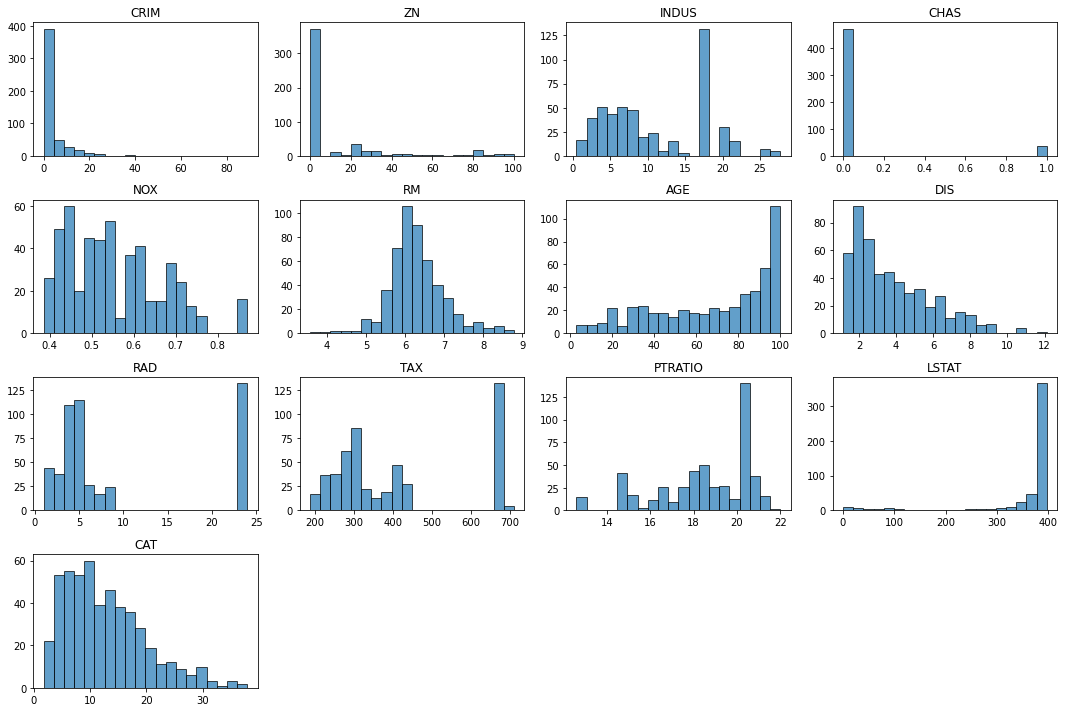

In [15]:
# Plot histograms of X variables in a subplot
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
for i, col in enumerate(X.columns):
    plt.subplot(4, 4, i + 1)
    plt.hist(X[col], bins=20, edgecolor='black', alpha=0.7)
    plt.title(col)
plt.tight_layout()
plt.show()

(array([ 9., 12., 18., 37., 40., 42., 83., 71., 72., 12., 23., 18., 16.,
        14.,  7.,  1.,  5.,  5.,  2., 19.]),
 array([ 5.  ,  7.25,  9.5 , 11.75, 14.  , 16.25, 18.5 , 20.75, 23.  ,
        25.25, 27.5 , 29.75, 32.  , 34.25, 36.5 , 38.75, 41.  , 43.25,
        45.5 , 47.75, 50.  ]),
 <BarContainer object of 20 artists>)

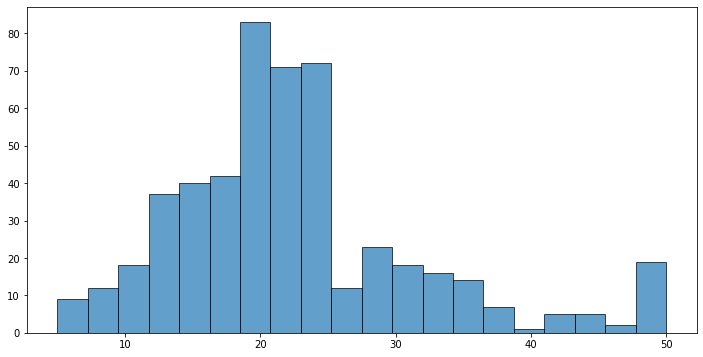

In [17]:
plt.figure(figsize = (12,6))
plt.hist(y, bins=20, edgecolor='black', alpha=0.7)

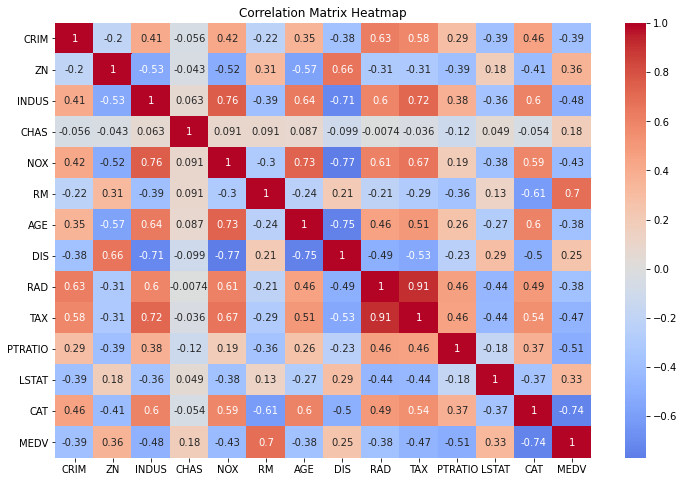

In [19]:
# Combine X and y
data_with_target = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = data_with_target.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Train Test Split and Scaling of the data

In [20]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Fitting

In [30]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_predictions = lr.predict(X_test_scaled)

In [23]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_predictions = rf.predict(X_test_scaled)

In [24]:
# XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_predictions = xgb.predict(X_test_scaled)

In [25]:
# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
lasso_predictions = lasso.predict(X_test_scaled)

# Model Evaluation and Comparison

In [26]:
# Evaluate Models
models = {'Linear Regression': lr_predictions,
          'Random Forest': rf_predictions,
          'XGBoost': xgb_predictions,
          'Lasso Regression': lasso_predictions}

In [27]:
for model_name, predictions in models.items():
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} - MSE: {mse:.2f}, R-squared: {r2:.2f}")

Linear Regression - MSE: 24.29, R-squared: 0.67
Random Forest - MSE: 7.91, R-squared: 0.89
XGBoost - MSE: 6.74, R-squared: 0.91
Lasso Regression - MSE: 24.33, R-squared: 0.67


In [28]:
# Select the Best Model
best_model = min(models, key=lambda x: mean_squared_error(y_test, models[x]))
print(f"Best Model: {best_model}")

Best Model: XGBoost


# Accuracy Measure Visualization

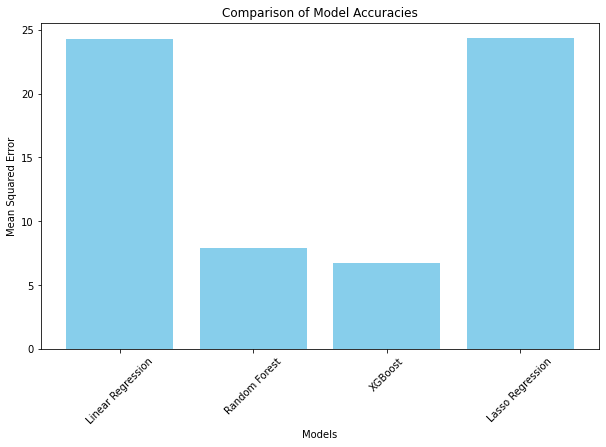

In [29]:
# Accuracy measures of each model
model_names = list(models.keys())
accuracies = [mean_squared_error(y_test, models[model]) for model in model_names]

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)
plt.show()

## XGBOOST WINS THE RACE WITH 91% R SQUARED VALUE|